In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
df2 = pd.read_csv("/content/test.csv")
df1 = pd.read_csv("/content/train.csv")
if "SalesPrice" not in df2.columns:
  df2["SalesPrice"] = 0
df = pd.concat([df1, df2], axis=0)
df = df.set_index("Id")


In [3]:
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,SalesPrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0,NaN
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0,NaN
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0,NaN
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0,NaN
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0,NaN


In [4]:
df_null = df[df.isnull().sum()[df.isnull().sum()>0].index]

In [5]:
df_null.head()

,MSZoning,LotFrontage,Alley,Utilities,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,BsmtQual,BsmtCond,...,GarageCars,GarageArea,GarageQual,GarageCond,PoolQC,Fence,MiscFeature,SaleType,SalePrice,SalesPrice
Id,,,,,,,,,,,,,,,,,,,,,
1,RL,65.0,NaN,AllPub,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,...,2.0,548.0,TA,TA,NaN,NaN,NaN,WD,208500.0,NaN
2,RL,80.0,NaN,AllPub,MetalSd,MetalSd,NaN,0.0,Gd,TA,...,2.0,460.0,TA,TA,NaN,NaN,NaN,WD,181500.0,NaN
3,RL,68.0,NaN,AllPub,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,...,2.0,608.0,TA,TA,NaN,NaN,NaN,WD,223500.0,NaN
4,RL,60.0,NaN,AllPub,Wd Sdng,Wd Shng,NaN,0.0,TA,Gd,...,3.0,642.0,TA,TA,NaN,NaN,NaN,WD,140000.0,NaN
5,RL,84.0,NaN,AllPub,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,...,3.0,836.0,TA,TA,NaN,NaN,NaN,WD,250000.0,NaN


<Axes: ylabel='Id'>

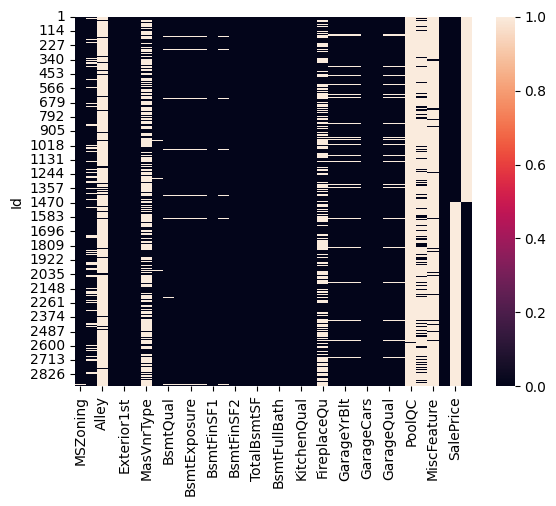

In [6]:
sns.heatmap(df_null.isnull())

In [8]:
df_objects = df[df.select_dtypes(include=["object"]).columns]
df =df.drop(df[df_objects.isna().sum()[df_objects.isna().sum()>1100].index],axis=1)

In [3]:

from sklearn.model_selection import KFold, train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor, StackingRegressor
from sklearn.linear_model import RidgeCV
import os


In [ ]:
train = pd.read_csv('/content/train.csv')
test = pd.read_csv('/content/test.csv')
sample = pd.read_csv('/content/sample_submission.csv')
print('Train shape:', train.shape)
print('Test shape:', test.shape)
train.head()


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Id,1460.0,NaN,NaN,NaN,730.5,421.610009,1.0,365.75,730.5,1095.25,1460.0
MSSubClass,1460.0,NaN,NaN,NaN,56.89726,42.300571,20.0,20.0,50.0,70.0,190.0
MSZoning,1460,5,RL,1151,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LotFrontage,1201.0,NaN,NaN,NaN,70.049958,24.284752,21.0,59.0,69.0,80.0,313.0
LotArea,1460.0,NaN,NaN,NaN,10516.828082,9981.264932,1300.0,7553.5,9478.5,11601.5,215245.0
Street,1460,2,Pave,1454,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Alley,91,2,Grvl,50,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LotShape,1460,4,Reg,925,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LandContour,1460,4,Lvl,1311,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Utilities,1460,2,AllPub,1459,NaN,NaN,NaN,NaN,NaN,NaN,NaN



Target distribution (SalePrice):


,SalePrice
count,1460.000000
mean,180921.195890
std,79442.502883
min,34900.000000
25%,129975.000000
50%,163000.000000
75%,214000.000000
max,755000.000000


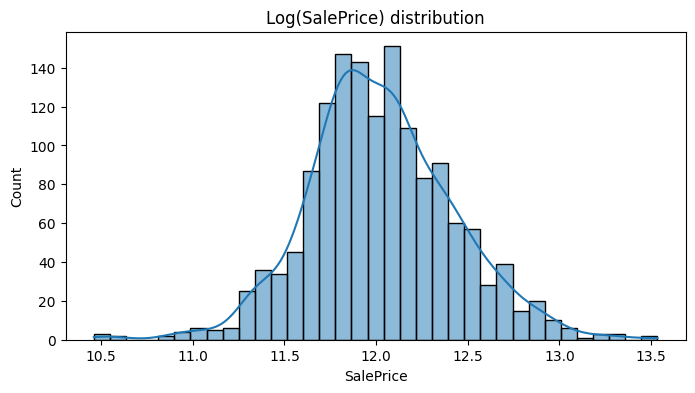

Columns with missing values (train): 19


,0
PoolQC,0.995205
MiscFeature,0.963014
Alley,0.937671
Fence,0.807534
MasVnrType,0.597260
FireplaceQu,0.472603
LotFrontage,0.177397
GarageQual,0.055479
GarageFinish,0.055479
GarageType,0.055479


In [12]:
#quickEDA
display(train.describe(include='all').T.head(20))
print('\nTarget distribution (SalePrice):')
display(train['SalePrice'].describe())
plt.figure(figsize=(8,4))
sns.histplot(np.log1p(train['SalePrice']), kde=True)
plt.title('Log(SalePrice) distribution')
plt.show()

#Missing values
miss = train.isnull().mean().sort_values(ascending=False)
miss = miss[miss>0]
print('Columns with missing values (train):', len(miss))
display(miss.head(20))


In [13]:
ordinal_maps = {
    'ExterQual': {'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5},
    'ExterCond': {'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5},
    'BsmtQual': {'NA':0, 'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5},
    'BsmtCond': {'NA':0, 'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5},
    'HeatingQC': {'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5},
    'KitchenQual': {'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5},
    'FireplaceQu': {'NA':0, 'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5},
    'GarageQual': {'NA':0, 'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5},
    'GarageCond': {'NA':0, 'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5},
    'PoolQC': {'NA':0, 'Fa':1, 'TA':2, 'Gd':3, 'Ex':4},
    'BsmtFinType1': {'NA':0, 'Unf':1, 'LwQ':2, 'Rec':3, 'BLQ':4, 'ALQ':5, 'GLQ':6},
    'BsmtFinType2': {'NA':0, 'Unf':1, 'LwQ':2, 'Rec':3, 'BLQ':4, 'ALQ':5, 'GLQ':6},
    'GarageFinish': {'NA':0, 'Unf':1, 'RFn':2, 'Fin':3},
    'Fence': {'NA':0, 'MnWw':1, 'GdWo':2, 'MnPrv':3, 'GdPrv':4},
    'LotShape': {'IR3':1, 'IR2':2, 'IR1':3, 'Reg':4},
    'LandSlope': {'Sev':1, 'Mod':2, 'Gtl':3},
    'Functional': {'Sal':1, 'Sev':2, 'Maj2':3, 'Maj1':4, 'Mod':5, 'Min2':6, 'Min1':7, 'Typ':8},
    'Utilities': {'ELO':1, 'NoSeWa':2, 'NoSewr':3, 'AllPub':4}
}


In [14]:
def apply_ordinals(df):
    for col, mp in ordinal_maps.items():
        if col in df.columns:
            df[col] = df[col].fillna('NA').map(mp)
    return df

def add_features(df):
    df['TotalSF'] = df.get('TotalBsmtSF', 0).fillna(0) + df.get('1stFlrSF', 0).fillna(0) + df.get('2ndFlrSF', 0).fillna(0)
    df['PorchSF'] = df[['OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch','WoodDeckSF']].sum(axis=1)
    df['TotalBath'] = (df.get('BsmtFullBath',0).fillna(0) + 0.5*df.get('BsmtHalfBath',0).fillna(0) +
                       df.get('FullBath',0).fillna(0) + 0.5*df.get('HalfBath',0).fillna(0))
    df['Age'] = df['YrSold'] - df['YearBuilt']
    df['RemodAge'] = df['YrSold'] - df['YearRemodAdd']
    df['HasPool'] = (df['PoolArea'].fillna(0) > 0).astype(int)
    df['HasGarage'] = (~df['GarageType'].isna()).astype(int) if 'GarageType' in df.columns else 0
    for c in ['LotFrontage','MasVnrArea','GarageYrBlt']:
        if c in df.columns:
            df[c + '_na'] = df[c].isna().astype(int)
    return df

train_fe = train.copy()
test_fe = test.copy()
train_fe = apply_ordinals(train_fe)
test_fe = apply_ordinals(test_fe)
train_fe = add_features(train_fe)
test_fe = add_features(test_fe)

print('Feature engineered sample:')
display(train_fe[['TotalSF','PorchSF','TotalBath','Age']].head())


Feature engineered sample:


,TotalSF,PorchSF,TotalBath,Age
0,2566,61,3.5,5
1,2524,298,2.5,31
2,2706,42,3.5,7
3,2473,307,2.0,91
4,3343,276,3.5,8


In [15]:
combined = pd.concat([train_fe, test_fe], keys=['train','test'])
num_cols = combined.select_dtypes(include=[np.number]).columns.tolist()
for c in num_cols:
    train_median = combined.loc['train', c].median() if c in train_fe.columns else np.nan
    combined[c] = combined[c].fillna(train_median)

obj_cols = combined.select_dtypes(include=['object']).columns.tolist()
from sklearn.preprocessing import LabelEncoder
for c in obj_cols:
    combined[c] = combined[c].fillna('MISSING').astype(str)
    combined[c] = LabelEncoder().fit_transform(combined[c])

train_proc = combined.loc['train'].copy().reset_index(drop=True)
test_proc  = combined.loc['test'].copy().reset_index(drop=True)

print('Processed shapes:', train_proc.shape, test_proc.shape)


Processed shapes: (1460, 91) (1459, 91)


In [16]:

def kfold_target_encoding(train_df, test_df, col, target_series, n_splits=5, alpha=10):
    tr = train_df.copy().reset_index(drop=True)
    te = test_df.copy().reset_index(drop=True)
    global_mean = target_series.mean()
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)
    oof = pd.Series(index=tr.index, dtype=float)
    test_preds = pd.Series(0, index=te.index, dtype=float)
    for tr_idx, val_idx in kf.split(tr):
        tr_fold = tr.iloc[tr_idx]
        target_tr = target_series.iloc[tr_idx]
        means = target_tr.groupby(tr_fold[col]).mean()
        counts = tr_fold.groupby(col)[col].count()
        smooth = (counts * means + alpha * global_mean) / (counts + alpha)
        oof.loc[val_idx] = tr.iloc[val_idx][col].map(smooth).fillna(global_mean).values
        test_preds += te[col].map(smooth).fillna(global_mean) / n_splits
    return oof, test_preds

y = np.log1p(train['SalePrice'])
price_series = pd.Series(np.expm1(y), name='SalePrice')
train_proc['Neighborhood_te'], test_proc['Neighborhood_te'] = kfold_target_encoding(
    train_proc, test_proc, 'Neighborhood', price_series, n_splits=5, alpha=15
)

print('Added Neighborhood_te feature.')


Added Neighborhood_te feature.


In [18]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
FEATURES = [c for c in train_proc.columns]
X = train_proc[FEATURES]
X_test = test_proc[FEATURES]
y = np.log1p(train['SalePrice'])

kf = KFold(n_splits=5, shuffle=True, random_state=42)
oof = np.zeros(X.shape[0])
test_preds = np.zeros(X_test.shape[0])

for fold, (tr_idx, val_idx) in enumerate(kf.split(X, y)):
    X_tr, X_val = X.iloc[tr_idx], X.iloc[val_idx]
    y_tr, y_val = y.iloc[tr_idx], y.iloc[val_idx]

    model = RandomForestRegressor(n_estimators=200, n_jobs=-1, random_state=42)
    model.fit(X_tr, y_tr)

    oof[val_idx] = model.predict(X_val)
    test_preds += model.predict(X_test) / kf.n_splits

    print(f'Fold {fold+1} RMSE (log):', np.sqrt(mean_squared_error(y_val, oof[val_idx])))

print('OOF RMSE (log):', np.sqrt(mean_squared_error(y, oof)))

sub = pd.DataFrame({'Id': test['Id'], 'SalePrice': np.expm1(test_preds)})

sub.to_csv('/content/drive/MyDrive/submission_rf.csv', index=False)
print('Saved to Google Drive: /content/drive/MyDrive/submission_rf.csv')


In [20]:
!pip install xgboost


In [ ]:
from xgboost import XGBRegressor
import numpy as np
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error

FEATURES = [c for c in train_proc.columns]
X = train_proc[FEATURES]
X_test = test_proc[FEATURES]
y = np.log1p(train['SalePrice'])

kf = KFold(n_splits=5, shuffle=True, random_state=42)
oof = np.zeros(X.shape[0])
test_preds = np.zeros(X_test.shape[0])

xgb_params = dict(
    n_estimators=2000,
    learning_rate=0.03,
    max_depth=4,
    subsample=0.8,
    colsample_bytree=0.8,
    reg_lambda=1.0,
    random_state=42,
    tree_method="hist"
)

for fold, (tr_idx, val_idx) in enumerate(kf.split(X, y)):
    X_tr, X_val = X.iloc[tr_idx], X.iloc[val_idx]
    y_tr, y_val = y.iloc[tr_idx], y.iloc[val_idx]

    model = XGBRegressor(**xgb_params)
    model.fit(
        X_tr, y_tr,
        eval_set=[(X_val, y_val)],
        eval_metric="rmse",
        early_stopping_rounds=100,
        verbose=False,
    )

    oof[val_idx] = model.predict(X_val)
    test_preds += model.predict(X_test) / kf.n_splits

    fold_rmse = np.sqrt(mean_squared_error(y_val, oof[val_idx]))
    print(f"Fold {fold+1} RMSE (log): {fold_rmse:.6f}")

oof_rmse = np.sqrt(mean_squared_error(y, oof))
print("OOF RMSE (log):", oof_rmse)

sub_xgb = pd.DataFrame({
    "Id": test["Id"],
    "SalePrice": np.expm1(test_preds)
})

sub_xgb.to_csv("/content/drive/MyDrive/submission_xgb.csv", index=False)
print("Saved to Google Drive: /content/drive/MyDrive/submission_xgb.csv")
